In [94]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import hashlib
import glob
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create reviews

In [95]:
from src.ask import analyseText
from src.dbkg import consolidateBits

In [96]:
FILES = glob.glob("data/pages/*.html")
LS = []
for fi in FILES:
    with open(fi, "r") as f:
        LS.append([f.read().strip(),fi.split(os.sep)[-1].split(".")[0]])
len(LS)

799

In [97]:
txts = pd.DataFrame(LS,columns=["Source","hash"])
txts["long"] = txts.Source.apply(lambda x: len(str(x)))
txts = txts[txts["long"]>600]
LS = txts.Source.unique()
print(len(txts))
txts.to_parquet("data/txts.parquet.gzip",compression="gzip")
txts.head(3)

556


,Source,hash,long
0,Ce projet vise à transformer les cours actuell...,7fdd64486b554e81c018d04aadeaed8b,1683
1,Ce projet regroupe plusieurs projets d'install...,ae16e1e592ede2766cc7d2fab6065ed2,985
2,"Bien qu’étant assez arborées, les cours d'écol...",97fb760d7bd5886a32c61bce40d585c0,855


In [98]:
if os.path.isfile("data/xls/db.parquet.gzip"):
    df = pd.read_parquet("data/xls/db.parquet.gzip").drop_duplicates()
    items = df.Source.unique()
else:
    items = []
    df = txts

for te in LS:
    if te in items:
        N = len(df[df.Source == te])
        try:
            DD = analyseText( te.strip(), TypeOfItem="Activities", PBN=False, Source="BudgetParis", Place="Paris", Reviewed=False, MIN=7-N, ow=False, seed="gpt-4o-mini", MODEL="gpt-4o-mini" )
        except:
            print("Issue with",te[:100])
    else:
        try:
            DD = analyseText( te.strip(), TypeOfItem="Activities", PBN=False, Source="BudgetParis", Place="Paris", Reviewed=False, MIN=7, ow=False, seed="gpt-4o-mini", MODEL="gpt-4o-mini" )
        except:
            print("Issue with",te[:100])


Adding another layer, len(df)= 3
--> Error with  d1b09057479570ee1b69dc934017c672 gpt-4o-mini- 
Le projet consiste à remettre en état l'Espace Glisse via les interventions suivantes :

- réparation des fuites (toit, funbox)
- clôture de l’espace, en posant des parois sur les 3 côtés ouverts
- installation d’une ventilation, d'une sonorisation fixe et d’un module complémentaire de glisse
				





































Où en est ce projet ?



La réfection des toitures de l’EGP ainsi que la pose de panneaux sur la façade nord pour éviter les infiltrations ont été réalisées pendant l’été 2020.

La deuxième phase de travaux, prévue à l’été 2021, consistera en la pose de nouveaux modules de glisse.
--> Error with  47d2d2416006d2ac8dd5e851db7cb639 gpt-4o-mini 
Le projet consiste à remettre en état l'Espace Glisse via les interventions suivantes :

- réparation des fuites (toit, funbox)
- clôture de l’espace, en posant des parois sur les 3 côtés ouverts
- installation d’une ventila

# Consolidate excels

In [99]:
df = consolidateBits(PATH="./data/xls/")
print(len(df),"reviews")

In [ ]:
from src.reportmgr import createExcel

In [ ]:
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))

In [ ]:
createExcel(df,"doc/WIP/Paris.xlsx","Texts from Paris","Paris","Review of Paris projects")

/home/kelu/projets/pariso37k/venv/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


'doc/WIP/Paris.xlsx'

# Creating visuals

In [ ]:
import src.img as iImg
df = pd.read_parquet("data/xls/db.parquet.gzip")
df = df[~df.Source.str.contains("data/pages")]
df = df[df.Place == "Paris"]
items = df.Source.unique()
print(len(items))
df

549


,FromProbono,Origin,Place,Type,Source,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,model,timestamp
0,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",The gardening workshop aims to enhance the env...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,5,Gardening workshop promotes biodiversity and s...,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
1,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",The initiative to green the courtyard with pla...,Attractiveness,Living and working environment,Neighbourhood,4,Greening courtyard enhances appeal and community.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
2,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",By establishing a gardening workshop and provi...,Well-being,Health and care in the community,Neighbourhood,4,Gardening improves nutrition and well-being.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
3,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",The gardening workshop serves as a communal sp...,Social cohesion,Culture and community identity,Neighbourhood,3,Collaborative gardening builds community ties.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
4,False,BudgetParis,Paris,Activities,"Fondé récemment, l'atelier de jardinage du col...",The project includes the acquisition of a comp...,Responsible resource use,Community smart infrastructures,Building,4,Composting initiative for resource management.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,False,BudgetParis,Paris,Activities,"Végétaliser nos rues, infrastructures et squar...",The text highlights the use of materials like ...,Responsible resource use,Community smart infrastructures,Building,3,Sustainable urban agriculture practices promoted.,Vegetalization of public spaces.,False,None,None
7338,False,BudgetParis,Paris,Activities,"Végétaliser nos rues, infrastructures et squar...","The collaborative nature of these projects, es...",Resilience,"Living together, interdependence and mutuality",Neighbourhood,3,Community resilience through collaboration.,Vegetalization of public spaces.,False,None,None
7339,False,BudgetParis,Paris,Activities,"Végétaliser nos rues, infrastructures et squar...",The project includes creative initiatives like...,Attractiveness,"Innovation, creativity and research",Neighbourhood,2,Focus on urban greening initiatives.,Vegetalization of public spaces.,False,None,None
7340,False,BudgetParis,Paris,Activities,"Végétaliser nos rues, infrastructures et squar...","While not a primary focus, the use of local ma...",Preservation and improvement of environment,Economy and sustainable production and consump...,Building,2,Local materials support sustainable gardening.,Vegetalization of public spaces.,False,None,None


/home/kelu/projets/pariso37k/src/img.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels,fontproperties=fontprop, fontsize=24, weight='bold')
/home/kelu/projets/pariso37k/src/img.py:152: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels,fontproperties=fontprop, fontsize=24, weight='bold')


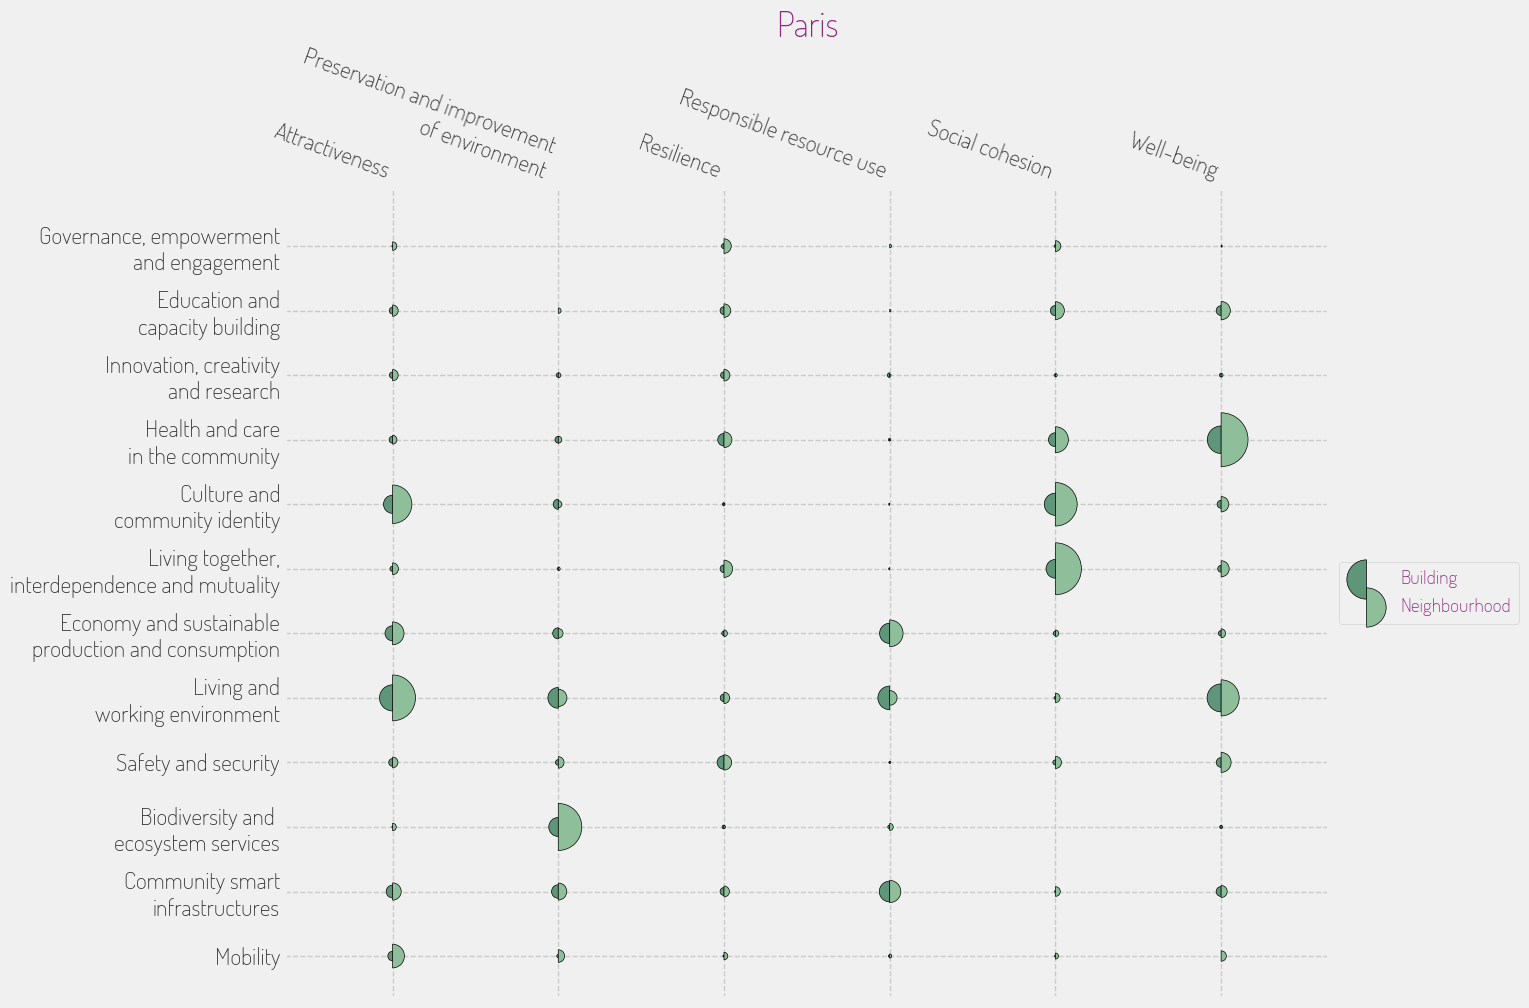

In [ ]:
df = df[df.Place == "Paris"]

dfRef = pd.DataFrame(columns=df.columns)
dfUC = df

plt, ax = iImg.createImg(dfUC,dfRef,title="Paris")
plt.savefig("doc/WIP/Paris.png", bbox_inches='tight')
plt.savefig("doc/WIP/Paris.svg", bbox_inches='tight')

# Create reports

In [ ]:
projets = pd.read_csv("data/bp_projets_gagnants.csv",sep=";")
projets

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Titre du projet lauréat,Thématique,Direction pilote du projet lauréat,Budget global du projet lauréat,Echelle du Budget participatif,Adresse du projet lauréat,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,Date de début des études du projet,Date de lancement des procédures du projet,Date de lancement des travaux du projet,Date prévisonnelle de livraison du projet,Date d'ouverture du projet au public,Dernière mise à jour des données du projet
0,2204,NaN,https://decider.paris.fr/bp/jsp/site/Portal.js...,2014,NaN,Cadre de vie,Direction de la Voirie et des Déplacements,1500000,Budget participatif parisien,Place de l' Hotel de Ville - Esplanade de la L...,75004,Non,FIN,2017-07,2018-04,2018-01,2018-06,2020-02,NaN
1,2206,NaN,https://decider.paris.fr/bp/jsp/site/Portal.js...,2014,Des jardins sur les murs,Environnement,Direction des Espaces Verts et de l’Environnement,2000000,Budget participatif parisien,Place de l' Hotel de Ville - Esplanade de la L...,75004,Non,FIN,2015-01,2015-01,2015-03,2015-04,2021-12,NaN
2,3720,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Une zone de remise en forme au jardin Eole,Cadre de vie,Direction des Espaces Verts et de l’Environnement,110000,Budget participatif d’arrondissement,jardin d'Eole,75018,Oui,FIN,2017-11,2018-04,2018-04,2018-07,2020-03,NaN
3,3780,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,#VillePlusPropre,Propreté,Direction de la Propreté et de l’Eau,3000000,Budget participatif parisien,Place de l' Hôtel de Ville - Esplanade de la L...,75004,Non,FIN,2017-01,2018-09,2018-10,2018-10,2022-01,NaN
4,8597,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2019,Accessibilité au square des Batignolles,Solidarités,Direction des Espaces Verts et de l’Environnement,45000,Budget participatif d’arrondissement,Square des Batignolles,75017,Non,FIN,2020-01,2020-06,2020-06,2020-07,2020-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,6282,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Faciliter les traversées piétonnes du Canal Sa...,Prévention et sécurité,Direction de la Voirie et des Déplacements,200000,Budget participatif d’arrondissement,146 quai de Jemmapes,75010,Oui,TRAVAUX,2019-08,NaN,2024-02,2026-03,NaN,NaN
1210,6196,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Des arbres et des arbustes fruitiers dans le 20e,Environnement,Direction des Espaces Verts et de l’Environnement,100000,Budget participatif d’arrondissement,6 Place Gambetta,75020,Non,FIN,2018-10,2019-10,2019-12,2022-12,2024-02,NaN
1211,1879,NaN,https://decider.paris.fr/bp/jsp/site/Portal.js...,2015,Embellir les cours des écoles du 18e arrondiss...,Education et jeunesse,Direction des Affaires Scolaires,800000,Budget participatif d’arrondissement,1 Place Jules Joffrin,75018,Oui,FIN,2016-01,2016-05,2016-07,2018-01,2018-06,NaN
1212,2807,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2016,Plus d’arbres dans les rues du 10e,Environnement,Direction des Espaces Verts et de l’Environnement,250000,Budget participatif d’arrondissement,72 Rue du Faubourg Saint-Martin,75010,Non,FIN,2017-03,2018-04,2018-03,2018-03,2018-04,NaN


In [ ]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
txts = pd.read_parquet("data/txts.parquet.gzip")
projets['hash'] = projets['Lien URL vers le projet lauréat'].apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()) )
txts.columns = ["hash","Source","long"]
print(len(txts),len(df))
projets_h = projets.merge(txts,on="hash",how="left")
print(len(projets_h))
projets_hh = projets_h.merge(df,on="Source",how="right")
print(len(projets_hh))
projets_hh.head(3)

799 7342
1214
7342


,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Titre du projet lauréat,Thématique,Direction pilote du projet lauréat,Budget global du projet lauréat,Echelle du Budget participatif,Adresse du projet lauréat,...,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,model,timestamp
0,3462,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Végétaliser un mur et créer un jardin de coule...,Education et jeunesse,Direction des Affaires Scolaires,1000,Budget participatif d’arrondissement,Collège Alviset,...,The gardening workshop aims to enhance the env...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,5,Gardening workshop promotes biodiversity and s...,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
1,3462,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Végétaliser un mur et créer un jardin de coule...,Education et jeunesse,Direction des Affaires Scolaires,1000,Budget participatif d’arrondissement,Collège Alviset,...,The initiative to green the courtyard with pla...,Attractiveness,Living and working environment,Neighbourhood,4,Greening courtyard enhances appeal and community.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"
2,3462,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Végétaliser un mur et créer un jardin de coule...,Education et jeunesse,Direction des Affaires Scolaires,1000,Budget participatif d’arrondissement,Collège Alviset,...,By establishing a gardening workshop and provi...,Well-being,Health and care in the community,Neighbourhood,4,Gardening improves nutrition and well-being.,School gardening project completed.,False,gpt-4o-mini,"10/23/2024, 20:31:09"


In [ ]:
import geopandas as gpd

In [ ]:
fp='data/budget-participatif_operations-projets-gagnants-realisations.geojson'
gdf = gpd.read_file(fp)
cols = list(gdf.columns)
cols[0] = "Identifiant du projet lauréat"
gdf.columns = cols
P = gdf.merge(projets_hh,on="Identifiant du projet lauréat",how="right")
print(list(P.columns))
P = P[P.Source.str.len() > 100]
P = P[P.Place == "Paris"]
P = P.sort_values(by="long").dropna(how= "any", axis=1).reset_index(drop=True)
print(len(P),"----",len(P.Source.unique()),"texts reviewed.")
print(list(P.columns))
P.to_parquet("data/dataset.parquet.gzip",compression="gzip")
P.head(3)

['Identifiant du projet lauréat', 'titre_operation', 'titre_projet_gagnant', 'edition', 'thematique', 'direction_pilote_operation', 'type_financement_operation', 'adresse_operation', 'arrondissement_operation', 'longitude', 'latitude', 'operation_q_pop', 'quartier_operation', 'avancement_operation', 'debut_etudes_operation', 'lancement_procedure_operation', 'lancement_travaux_operation', 'livraison_prev_operation', 'ouverture_operation', 'identifiant_projet_gagnant', 'lien_projet_soumis', 'lien_projet_gagnant', 'direction_pilote_projet', 'budget_global_projet_gagnant', 'echelle_bp', 'adresse_projet_gagnant', 'arrondissement_projet_gagnant', 'projet_q_pop', 'avancement_projet', 'debut_etudes_projet', 'lancement_procedure_projet', 'lancement_travaux_projet', 'livraison_prev_projet', 'ouverture_projet', 'derniere_mise_a_jour_donnees', 'geo_point_2d', 'geometry', 'Lien URL vers le projet soumis au vote', 'Lien URL vers le projet lauréat', 'Edition', 'Titre du projet lauréat', 'Thématique',

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By improving the bridge and fostering a pedest...,Social cohesion,Culture and community identity,Neighbourhood,4,Enhancing community connection and inclusiveness.,Beautification project for Louis Philippe Bridge.,False
1,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the aesthetic appe...,Attractiveness,Mobility,Neighbourhood,4,Louis Philippe Bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
2,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By enhancing the bridge's environment and addi...,Well-being,Living and working environment,Neighbourhood,3,"Bridge improvement benefits residents, limited.",Beautification project for Louis Philippe Bridge.,False


# Documents

In [ ]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [ ]:
import pandas as pd
import hashlib, os

In [ ]:
df = pd.read_parquet("data/xls/db.parquet.gzip")
df["ID"] = df.Source.apply(lambda x: str(hashlib.md5(x.encode("utf-8")).hexdigest()))
IDS = list(df.ID.unique())
K = list(chunks(IDS, 10))
for k in range(len(K)):
    if not os.path.isfile("doc/WIP/Paris_"+str(k)+".xlsx"):
        DF = df[df.ID.isin(K[k])]
        createExcel(df,"doc/WIP/Paris_"+str(k)+".xlsx","Paris budget participatif","Paris","Review of the budget")
        print(k,"done")

# Import and consolidate

In [ ]:
import pandas as pd
import OAI

In [ ]:
df = pd.read_parquet("data/dataset.parquet.gzip")
df

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By improving the bridge and fostering a pedest...,Social cohesion,Culture and community identity,Neighbourhood,4,Enhancing community connection and inclusiveness.,Beautification project for Louis Philippe Bridge.,False
1,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the aesthetic appe...,Attractiveness,Mobility,Neighbourhood,4,Louis Philippe Bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
2,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By enhancing the bridge's environment and addi...,Well-being,Living and working environment,Neighbourhood,3,"Bridge improvement benefits residents, limited.",Beautification project for Louis Philippe Bridge.,False
3,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The beautification of the Louis Philippe Bridg...,Attractiveness,Culture and community identity,Neighbourhood,3,Bridge beautification enhances cultural identity.,Beautification project for Louis Philippe Bridge.,False
4,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the Louis Philippe...,Attractiveness,Living and working environment,Neighbourhood,4,Louis Philippe bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The various innovative solutions for waste red...,Resilience,"Innovation, creativity and research",Neighbourhood,3,Innovative waste solutions enhance resilience.,Waste reduction and resource sharing.,False
7338,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The text emphasizes the need to minimize waste...,Responsible resource use,Economy and sustainable production and consump...,Neighbourhood,5,"Minimize waste, promote sustainability.",Waste reduction and resource sharing.,False
7339,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,Although resilience in the context of environm...,Resilience,Safety and security,Neighbourhood,2,Resilience needs crisis management emphasis.,Waste reduction and resource sharing.,False
7340,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The initiatives described in the text aim t

In [ ]:
h = OAI.Helper("iso_ask", "./cache")
h.GOTOCACHE = "./cache/"

In [ ]:
def shortSummary(x):
    return h.ask(
                    "Give a title in english to the text below in up to 5 words. It cannot be longer than 5 words, and your answer must be only the title.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [ ]:
def longSummary(x):
    return h.ask(
                    "Summarize in english the text below in up to  5 sentences. It cannot be longer than 5 sentences, and your answer must be only the summary.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [ ]:
def Summary(x):
    return h.ask(
                    "Summarize in english the text below in up to 3 paragraphs. It cannot be longer than 3 paragraphs, and your answer must be only the summary.",
                    x,
                    v="gpt-3.5-turbo",
                    ow=False,
                )


In [ ]:
X = df[df.Source.str.len() > 100]
print(len(X.Source.unique()))
X.reset_index(drop=True)

549


,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Place,Type,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed
0,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By improving the bridge and fostering a pedest...,Social cohesion,Culture and community identity,Neighbourhood,4,Enhancing community connection and inclusiveness.,Beautification project for Louis Philippe Bridge.,False
1,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the aesthetic appe...,Attractiveness,Mobility,Neighbourhood,4,Louis Philippe Bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
2,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,By enhancing the bridge's environment and addi...,Well-being,Living and working environment,Neighbourhood,3,"Bridge improvement benefits residents, limited.",Beautification project for Louis Philippe Bridge.,False
3,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The beautification of the Louis Philippe Bridg...,Attractiveness,Culture and community identity,Neighbourhood,3,Bridge beautification enhances cultural identity.,Beautification project for Louis Philippe Bridge.,False
4,3365,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Cadre de vie,31000,Budget participatif d’arrondissement,75004,Non,FIN,...,Paris,Activities,The project aims to enhance the Louis Philippe...,Attractiveness,Living and working environment,Neighbourhood,4,Louis Philippe bridge enhancement project.,Beautification project for Louis Philippe Bridge.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The various innovative solutions for waste red...,Resilience,"Innovation, creativity and research",Neighbourhood,3,Innovative waste solutions enhance resilience.,Waste reduction and resource sharing.,False
7338,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The text emphasizes the need to minimize waste...,Responsible resource use,Economy and sustainable production and consump...,Neighbourhood,5,"Minimize waste, promote sustainability.",Waste reduction and resource sharing.,False
7339,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,Although resilience in the context of environm...,Resilience,Safety and security,Neighbourhood,2,Resilience needs crisis management emphasis.,Waste reduction and resource sharing.,False
7340,3788,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2017,Solidarités,3500000,Budget participatif parisien,75004,Non,LIVRAISON,...,Paris,Activities,The initiatives described in the text aim t

In [ ]:
if True:
    df.loc[df.Source.str.len() > 100,"Source_Title"] = df.Source.apply(lambda x: shortSummary(x))
    df.loc[df.Source.str.len() > 100,"Summary"] = df.Source.apply(lambda x: longSummary(x))
    df.loc[df.Source.str.len() > 100,"Paragraph"] = df.Source.apply(lambda x: Summary(x))
else:
    df.loc[df.Source.str.len() > 100,"Source_Title"] = df.Source.apply(lambda x: str(x))
    df.loc[df.Source.str.len() > 100,"Summary"] = df.Source.apply(lambda x: str(x))
    df.loc[df.Source.str.len() > 100,"Paragraph"] = df.Source.apply(lambda x: str(x))


Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:21 --> 10/23/2024, 23:20:22
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:22 --> 10/23/2024, 23:20:23
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:23 --> 10/23/2024, 23:20:24
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:24 --> 10/23/2024, 23:20:25
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:26 --> 10/23/2024, 23:20:27
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:27 --> 10/23/2024, 23:20:27
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:28 --> 10/23/2024, 23:20:29
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:29 --> 10/23/2024, 23:20:30
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:30 --> 10/23/2024, 23:20:31
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:31 --> 10/23/2024, 23:20:32
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:32 --> 10/23/2024, 23:20:33
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:33 --> 10/23/2024, 23:20:34
Processing with gpt-3.5-turbo :	 10/23/2024, 23:20:3

In [ ]:
df[df.Source.str.len() > 100].reset_index(drop=True).to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")

# Pages

In [ ]:
DF = pd.read_parquet("data/dataset.parquet.gzip")

In [ ]:
ALL = pd.concat([DF,df]).sort_values(by=["Source","Identifiant du projet lauréat"]).ffill().drop_duplicates().reset_index(drop=True)
ALL

,Identifiant du projet lauréat,Lien URL vers le projet soumis au vote,Lien URL vers le projet lauréat,Edition,Thématique,Budget global du projet lauréat,Echelle du Budget participatif,Arrondissement du projet lauréat,Projet en Quartier populaire,Avancement du projet,...,Justification,Purpose,Issue,Scale,Score,Justification_Short,Source_Title,Reviewed,Summary,Paragraph
0,6342,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Environnement,160000,Budget participatif d’arrondissement,75011,Non,FIN,...,The project aims to enhance the attractiveness...,Attractiveness,Living and working environment,Neighbourhood,5,Enhancing public spaces for community.,Revamp parks for better usability.,False,NaN,NaN
1,6342,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Environnement,160000,Budget participatif d’arrondissement,75011,Non,FIN,...,This initiative encourages community interacti...,Social cohesion,Culture and community identity,Neighbourhood,4,Enhancing community spaces fosters connection.,Revamp parks for better usability.,False,NaN,NaN
2,6342,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Environnement,160000,Budget participatif d’arrondissement,75011,Non,FIN,...,By improving green spaces and creating new rec...,Well-being,Health and care in the community,Neighbourhood,4,Enhancing green spaces promotes well-being.,Revamp parks for better usability.,False,NaN,NaN
3,6342,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Environnement,160000,Budget participatif d’arrondissement,75011,Non,FIN,...,The proposal to air out and enhance the planti...,Preservation and improvement of environment,Biodiversity and ecosystem services,Neighbourhood,3,Enhancing jardin Louis Majorelle's biodiversity.,Revamp parks for better usability.,False,NaN,NaN
4,6342,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2018,Environnement,160000,Budget participatif d’arrondissement,75011,Non,FIN,...,The project supports resilience by fostering c...,Resilience,"Living together, interdependence and mutuality",Neighbourhood,3,Building community resilience through shared s...,Revamp parks for better usability.,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,10012,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Education et jeunesse,1580000,Budget participatif d’arrondissement,75005,Non,LIVRAISON,...,The project focuses on enhancing the learning ...,Well-being,Health and care in the community,Building,5,Enhancing children's school learning environment.,"""Schools Renovation Project Progress Report""",False,Several schools in the 5th district are being ...,The project aims to equip and renovate schools...
10534,10012,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Education et jeunesse,1580000,Budget participatif d’arrondissement,75005,Non,LIVRAISON,...,The renovations aim to make schools more appea...,Attractiveness,Living and working environment,Building,4,Renovations improve schools' appeal and learning.,"""Schools Renovation Project Progress Report""",False,Several schools in the 5th district are being ...,The project aims to equip and renovate schools...
10535,10012,https://decider.paris.fr/bp/jsp/site/Portal.js...,https://decider.paris.fr/bp/jsp/site/Portal.js...,2021,Education et jeunesse,1580000,Budget participatif d’arrondissement,75005,Non,LIVRAISON,...,By improving schools and creating spaces for v...,Social cohesion,"Living together, interdependence and mutuality",Building,4,Enhancing schools fosters community interaction.,"""Schools Renovation Project Progress Report""",False,Several schools in the 5th district are bein

In [ ]:
ALL.to_parquet("data/dataset_v2.parquet.gzip",compression="gzip")